In [ ]:
import numpy
import scipy
import scipy.stats
from matplotlib import pyplot
import seaborn
import pandas as pd

I just want to walk through using Cholesky matrices for constructing and working multivariate normal distributions, especially for representing the covariance matrix.

A Cholesky matrix is lower triangular matrix with positive real values on the diagonal such that

$$\Sigma = L L^T$$

So if I want to do optimization with where I need to estimate a $D x D$ covariance matrix (such as full-rank ADVI), I need to define $D$ positive continuous parameters and $D^2-D 


In [ ]:
D=4
ind=numpy.tril_indices(D,k=-1)
chol=numpy.zeros((D,D))
n_corrs= int(((D-1)**2+D-1)/2)

chol[ind]+=scipy.stats.norm.rvs(0,2,size=n_corrs)
chol+=numpy.eye(*(D,D))

<AxesSubplot:>

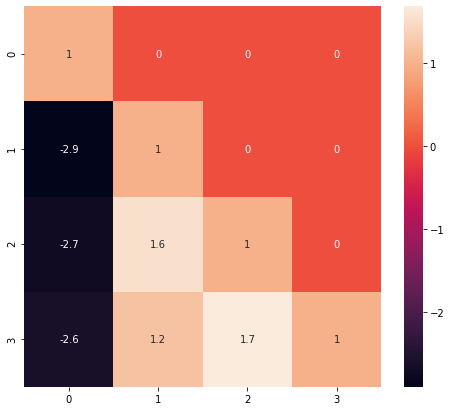

In [ ]:
pyplot.figure(figsize=(8,7))
seaborn.heatmap(chol, annot=True)

<AxesSubplot:>

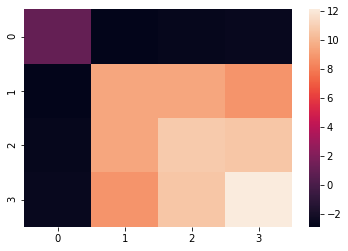

In [ ]:
seaborn.heatmap(numpy.matmul(chol, chol.T))

In [ ]:
data=scipy.stats.multivariate_normal.rvs(numpy.zeros(D), cov=numpy.matmul(chol, chol.T), size=100)

In [ ]:
pd.DataFrame(data)

0         1         2         3
0   1.844939 -2.927098 -2.827277 -5.230144
1   0.400724 -0.997226 -0.863269 -0.779457
2   1.265073 -2.937878 -2.476841 -3.453377
3  -0.903342  2.139852  2.250702  3.956039
4  -1.015797  4.171490  4.492809  3.924891
..       ...       ...       ...       ...
95 -0.279900 -1.840071 -4.434291 -4.128606
96  0.321229 -2.582678 -3.622734 -3.572240
97 -1.416338  5.063246  4.165890  3.493817
98  1.961531 -4.061715 -2.235053 -3.106139
99 -0.705838  1.402838  3.687755  6.265788

[100 rows x 4 columns]

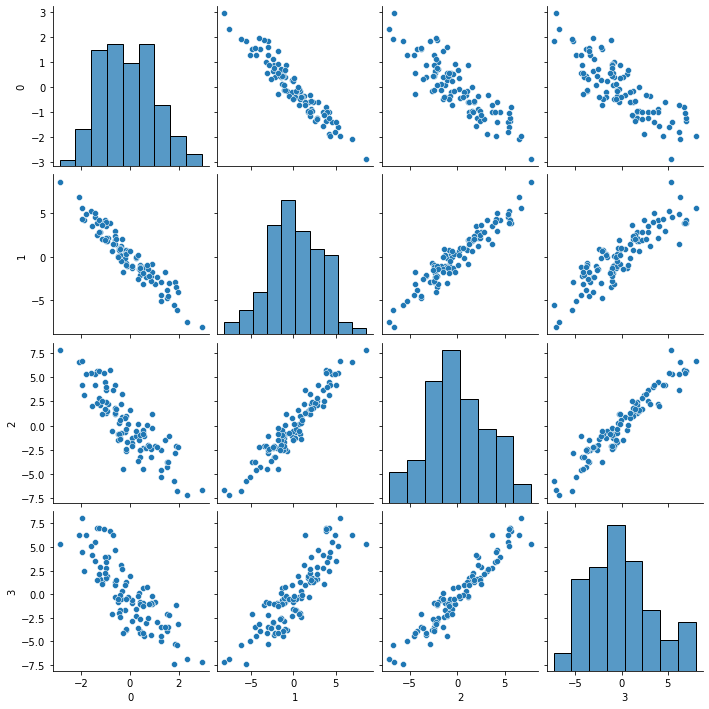

In [ ]:
seaborn.pairplot(pd.DataFrame(data))

What about constructing partial-rank correlation matrices?

In [ ]:
D=10
R=4

ind=numpy.triu_indices(R,k=0)
chol=scipy.stats.norm.rvs(0,2,size=(D,R))
# n_corrs= int(((D-1)**2+D-1)/2)
chol[ind]=0
chol[:R,:R]+=numpy.eye(*(R,R))

In [ ]:
data=scipy.stats.multivariate_normal.rvs(numpy.zeros(D), cov=numpy.matmul(chol, chol.T), size=100)

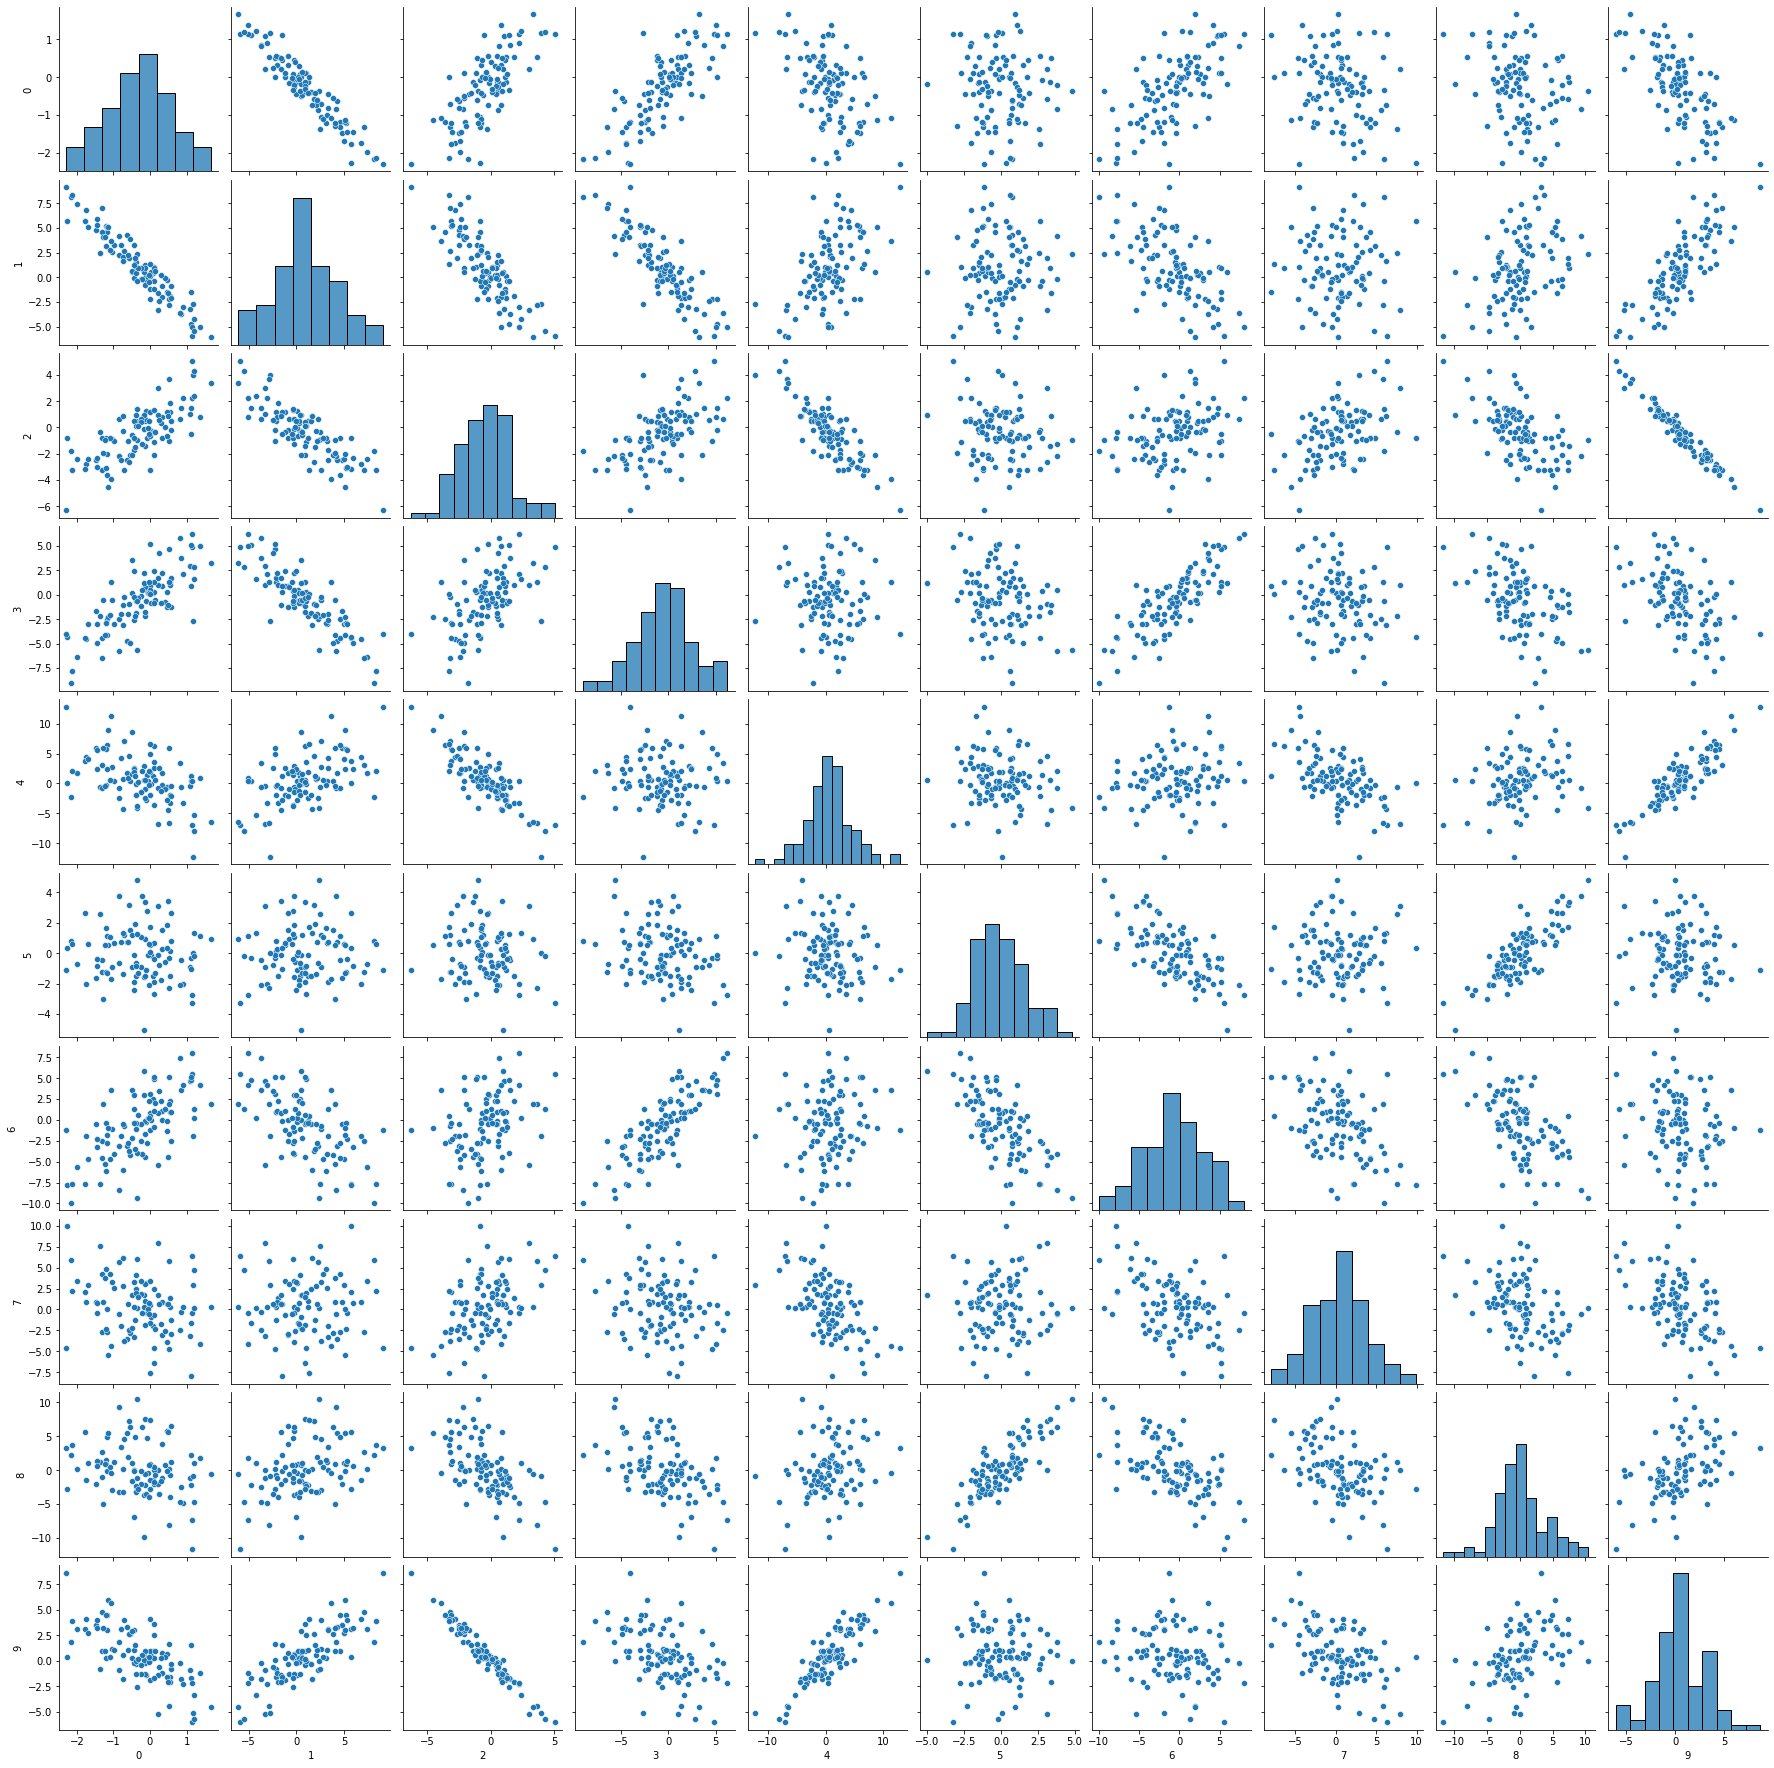

In [ ]:
seaborn.pairplot(pd.DataFrame(data))